Exploratory Data Analysis

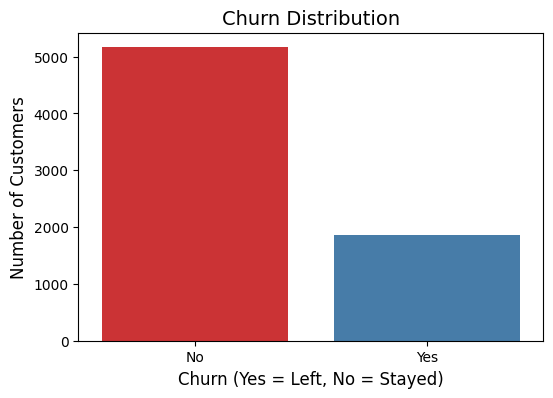

Percentage who churned: 26.58%


In [42]:
#Plot of how many customers left vs stayed
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='Set1')
plt.title('Churn Distribution', fontsize=14)
plt.xlabel('Churn (Yes = Left, No = Stayed)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"Percentage who churned: {churn_rate['Yes']:.2f}%")

Numerical Features (Tenure, Charges)

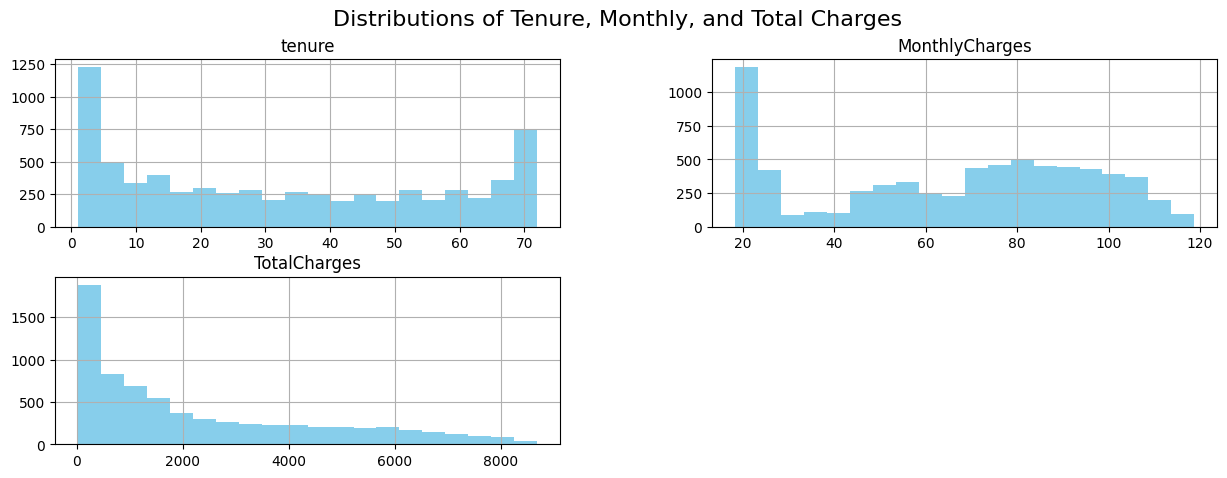

In [43]:
#List of number-based columns we consider
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Histograms to see how these numbers spread out
df[num_features].hist(bins=20, figsize=(15, 5), color='skyblue')
plt.suptitle('Distributions of Tenure, Monthly, and Total Charges', fontsize=16)
plt.show()


 Boxplot: How tenure differs for churners vs stayers

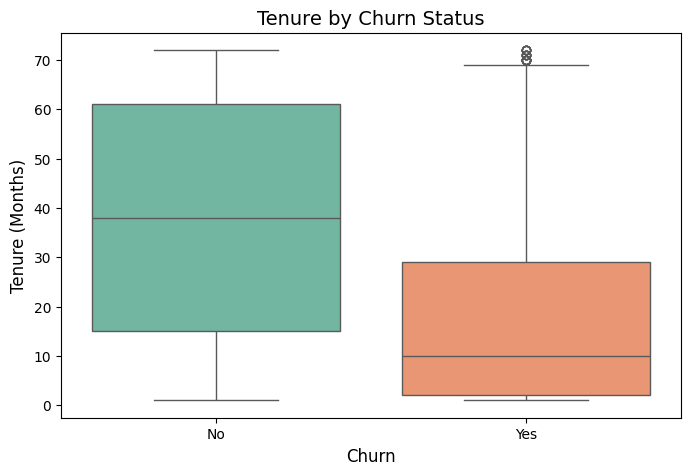

In [44]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')
plt.title('Tenure by Churn Status', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Tenure (Months)', fontsize=12)
plt.show()

Scatterplot: Tenure vs MonthlyCharges, colored by churn

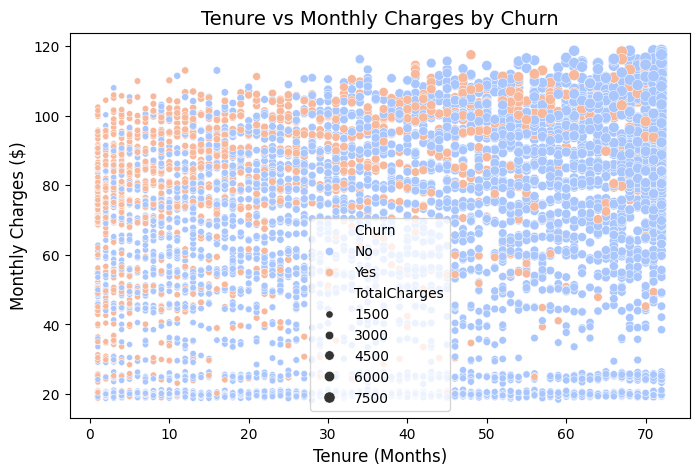

In [45]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', size='TotalCharges', data=df, palette='coolwarm')
plt.title('Tenure vs Monthly Charges by Churn', fontsize=14)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)
plt.show()

Categorical Features

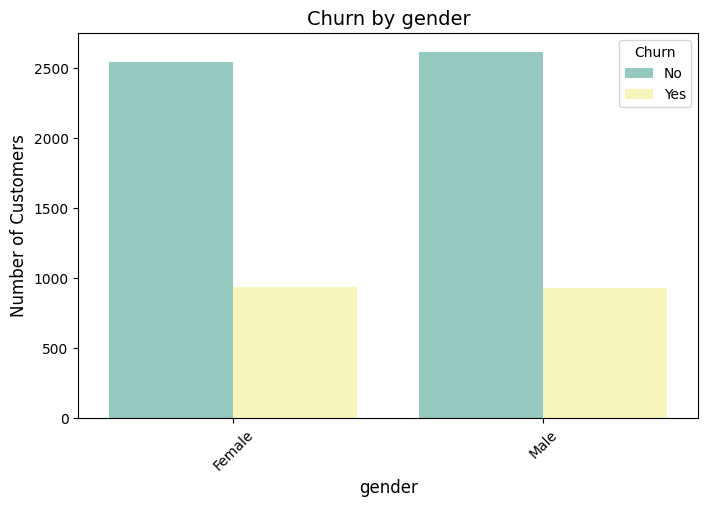

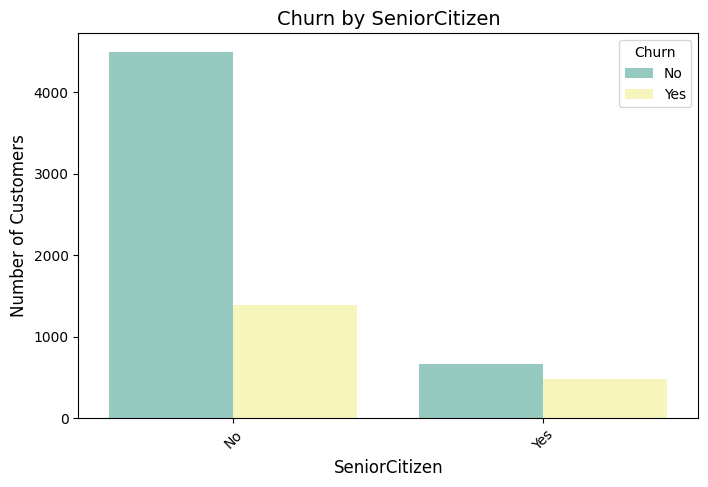

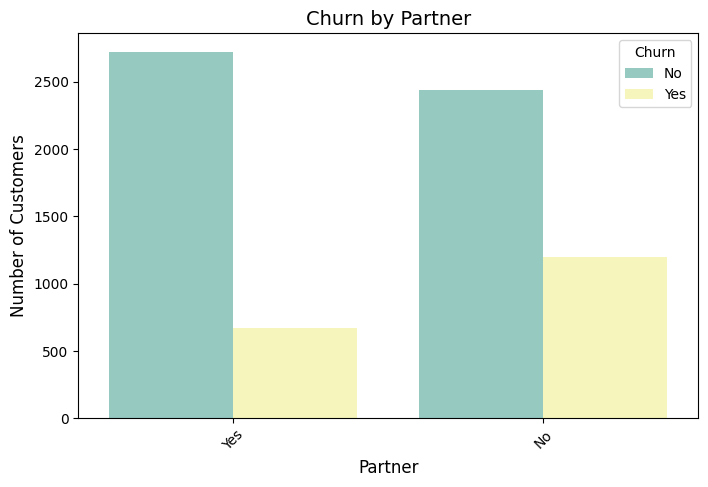

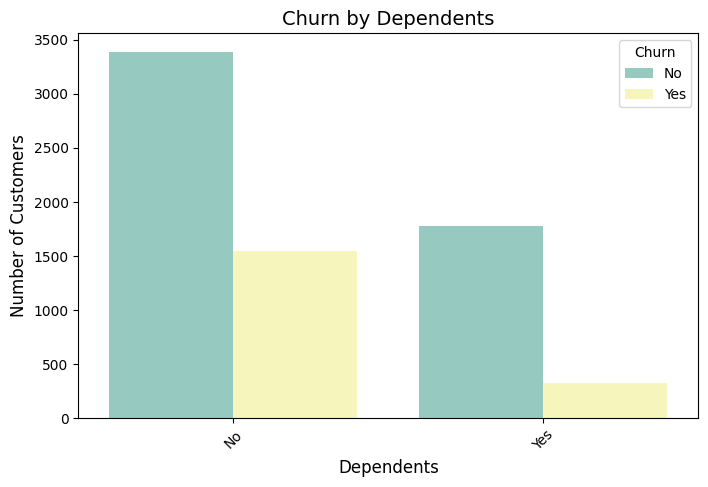

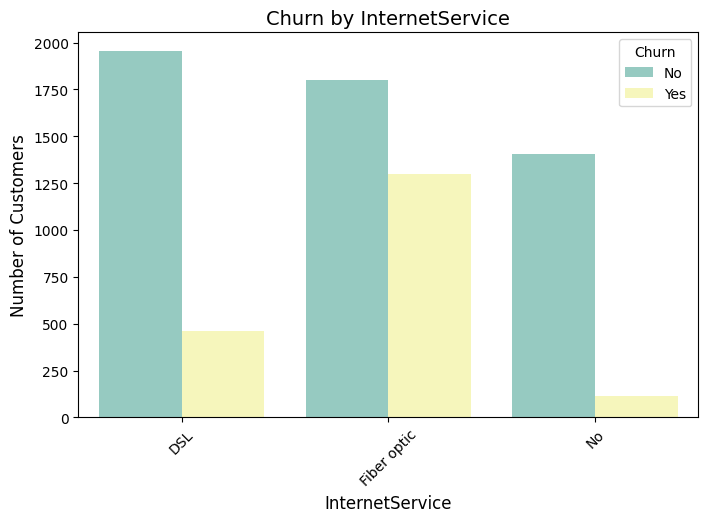

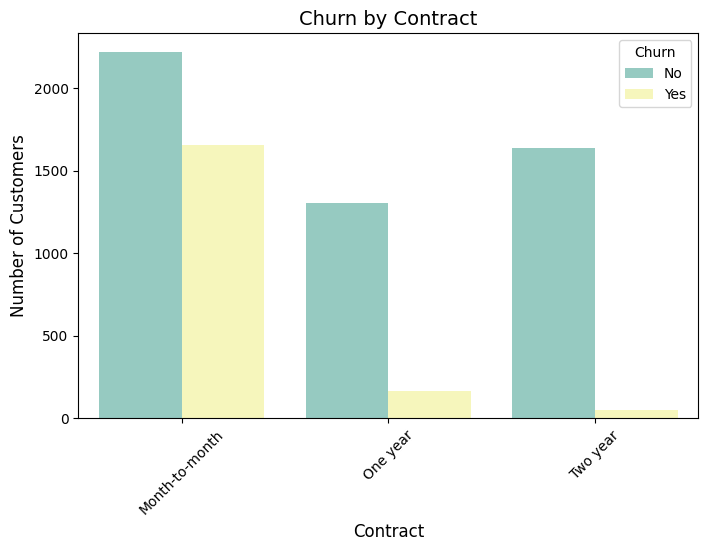

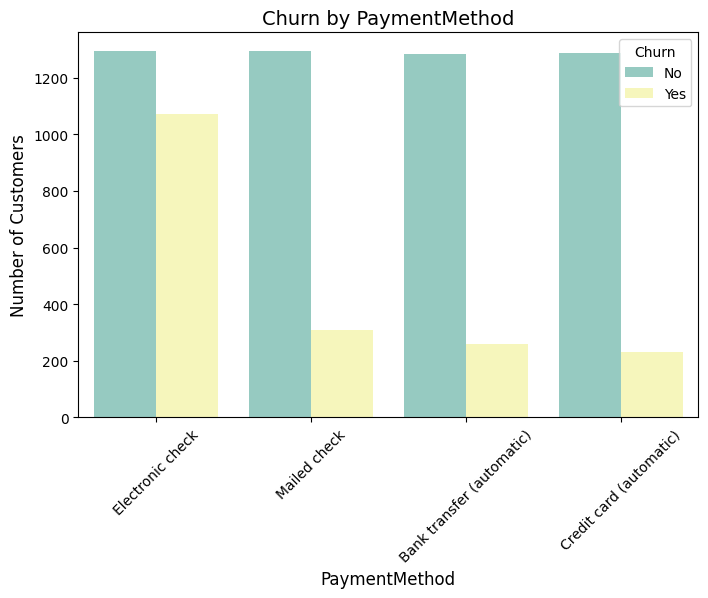

In [46]:
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'Contract', 'PaymentMethod']
for col in cat_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=df, palette='Set3')
    plt.title(f'Churn by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()


Special plot: Churn percentage by contract type

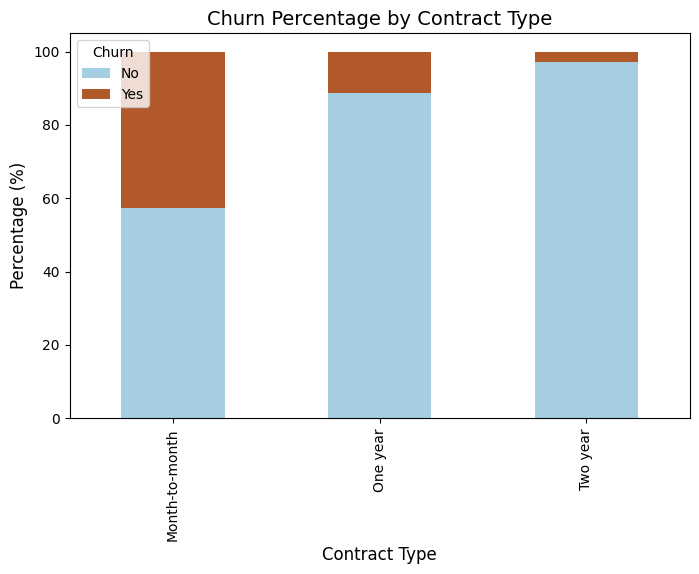

In [47]:
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
contract_churn.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Paired')
plt.title('Churn Percentage by Contract Type', fontsize=14)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

Correlation Between Numbers

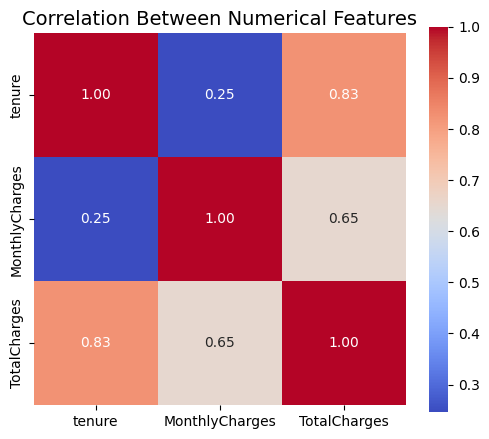

In [48]:
corr_matrix = df[num_features].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Between Numerical Features', fontsize=14)
plt.show()